# Timeseries data with PySPEDAS + PyTplot

This notebook demonstrates how to work with time series data using PySPEDAS and PyTplot. 

The following line installs pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [1]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Load some data

We'll use MMS FPI ion distribution data as an example; this is a good case to show because the data are multi-dimensional

In [2]:
import pyspedas

pyspedas.mms.fpi(trange=['2015-10-16/13:05', '2015-10-16/13:06'],
                 data_rate='brst',
                 datatype=['dis-dist', 'dis-moms'])

19-Feb-24 23:07:25: Downloading mms1_fpi_brst_l2_dis-dist_20151016130334_v3.3.0.cdf to pydata/mms1/fpi/brst/l2/dis-dist/2015/10/16
19-Feb-24 23:07:35: Downloading mms1_fpi_brst_l2_dis-dist_20151016130524_v3.3.0.cdf to pydata/mms1/fpi/brst/l2/dis-dist/2015/10/16
19-Feb-24 23:07:59: Downloading mms1_fpi_brst_l2_dis-moms_20151016130334_v3.3.0.cdf to pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16
19-Feb-24 23:08:01: Downloading mms1_fpi_brst_l2_dis-moms_20151016130524_v3.3.0.cdf to pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16
19-Feb-24 23:08:06: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016130334_v3.3.0.cdf
19-Feb-24 23:08:06: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016130524_v3.3.0.cdf
19-Feb-24 23:08:08: Loading pydata/mms1/fpi/brst/l2/dis-dist/2015/10/16/mms1_fpi_brst_l2_dis-dist_20151016130334_v3.3.0.cdf
19-Feb-24 23:08:08: Loading pydata/mms1/fpi/brst/l2/dis-dist/2015/10/16/mms1_fpi_brst_l2_dis-dist_201510

['Epoch',
 'Epoch_plus_var',
 'Epoch_minus_var',
 'mms1_dis_errorflags_brst',
 'mms1_dis_compressionloss_brst',
 'mms1_dis_steptable_parity_brst',
 'mms1_dis_startdelphi_count_brst',
 'mms1_dis_startdelphi_angle_brst',
 'mms1_dis_phi_brst',
 'mms1_dis_phi_delta_brst',
 'mms1_dis_dist_brst',
 'mms1_dis_disterr_brst',
 'mms1_dis_sector_despinp_brst',
 'mms1_dis_theta_brst',
 'mms1_dis_theta_delta_brst',
 'mms1_dis_energy_brst',
 'mms1_dis_energy_delta_brst',
 'mms1_dis_energyspectr_px_brst',
 'mms1_dis_energyspectr_mx_brst',
 'mms1_dis_energyspectr_py_brst',
 'mms1_dis_energyspectr_my_brst',
 'mms1_dis_energyspectr_pz_brst',
 'mms1_dis_energyspectr_mz_brst',
 'mms1_dis_energyspectr_omni_brst',
 'mms1_dis_spectr_bg_brst',
 'mms1_dis_numberdensity_bg_brst',
 'mms1_dis_numberdensity_brst',
 'mms1_dis_numberdensity_err_brst',
 'mms1_dis_densityextrapolation_low_brst',
 'mms1_dis_densityextrapolation_high_brst',
 'mms1_dis_bulkv_dbcs_brst',
 'mms1_dis_bulkv_spintone_dbcs_brst',
 'mms1_dis_bul

## Store data that is a function of time

The data are now loaded into `tplot` variables (the `t` stands for `timeseries`!); access the data:

In [3]:
from pyspedas import get_data

In [4]:
data = get_data('mms1_dis_dist_brst', dt=True)

## Handle time scales with leapseconds

The `dt` option tells `get_data` to return the times as a `numpy` array of type `datetime64[ns]`. These are unix times (so no leap seconds) in UTC. 

Note: the original dataset contains leap seconds and we remove them when loading the data. I think having this policy technically meets the requiremnt of handling time scales with leapseconds. 

In [5]:
data.times

array(['2015-10-16T13:03:34.033868000', '2015-10-16T13:03:34.183868000',
       '2015-10-16T13:03:34.333868000', ...,
       '2015-10-16T13:07:43.485598000', '2015-10-16T13:07:43.635598000',
       '2015-10-16T13:07:43.785598000'], dtype='datetime64[ns]')

## Store multi-dimensional data

The data values are in `data.y` (note the 4D dataset, simply stored as a `numpy` array):

In [6]:
data.y.shape

(1531, 32, 16, 32)

## Store and use physical units with the data and any non-time indices

This is a function of time, energy, theta and phi. The phi values, which are time varying for this dataset, are in `v1`:

In [7]:
data.v1.shape

(1531, 32)

The phi values for the first time stamp are:

In [8]:
data.v1[0, :]

array([  9.500004,  20.750004,  32.000004,  43.250004,  54.500004,
        65.75001 ,  77.00001 ,  88.25001 ,  99.50001 , 110.75001 ,
       122.00001 , 133.25    , 144.5     , 155.75    , 167.      ,
       178.25    , 189.5     , 200.75    , 212.      , 223.25    ,
       234.5     , 245.75    , 257.      , 268.25    , 279.5     ,
       290.75    , 302.      , 313.25    , 324.5     , 335.75    ,
       347.      , 358.25    ], dtype=float32)

The theta values are:

In [9]:
data.v2.shape

(16,)

In [10]:
data.v2

array([  5.625,  16.875,  28.125,  39.375,  50.625,  61.875,  73.125,
        84.375,  95.625, 106.875, 118.125, 129.375, 140.625, 151.875,
       163.125, 174.375], dtype=float32)

And the energy values are (also time varying for this dataset):

In [11]:
data.v3.shape

(1531, 32)

So the energy table for the first timestamp are:

In [12]:
data.v3[0, :]

array([1.206000e+01, 1.549000e+01, 1.989000e+01, 2.555000e+01,
       3.282000e+01, 4.216000e+01, 5.415000e+01, 6.956000e+01,
       8.934000e+01, 1.147600e+02, 1.474100e+02, 1.893400e+02,
       2.432100e+02, 3.124000e+02, 4.012700e+02, 5.154200e+02,
       6.620500e+02, 8.503900e+02, 1.092310e+03, 1.403060e+03,
       1.802200e+03, 2.314900e+03, 2.973450e+03, 3.819340e+03,
       4.905880e+03, 6.301520e+03, 8.094190e+03, 1.039685e+04,
       1.335458e+04, 1.715373e+04, 2.203368e+04, 2.830189e+04],
      dtype=float32)

## Store data in a format that can be used with scientific Python libraries

Since all of the data are available as `numpy` arrays, I think this requirement is met, but you can also access the underlying `xarray` object using `get_data`:

In [13]:
xrdata = get_data('mms1_dis_dist_brst', xarray=True)

In [14]:
xrdata

<xarray.DataArray 'mms1_dis_dist_brst' (time: 1531, v1_dim: 32, v2_dim: 16,
                                        v3_dim: 32)>
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 2.21562505e-27],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.31603333e-27, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.08148318e-27, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[1.23251551e-20, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          8.42857433e-27, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 5.33773217e-27, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2015-10-16T13:03:34.033868 ... 2015-10-1...
    spec_bins  (v2_dim) float32 5.625 16.88 28.12 39.38 ... 151.9 163.1 174.4
    v1         (time, v1_dim) float32 9.5 20.75 32.0 43.25 ... 334.8 346.0 357.2
    v2         (v2_dim) float32 5.625 16.88 28.12 39.38 ... 151.9 163.1 174.4
    v3         (time, v3_dim) float32 12.06 15.49 19.89 ... 1.944e+04 2.497e+04
Dimensions without coordinates: v1_dim, v2_dim, v3_dim
Attributes:
    CDF:           {'VATT': {'CATDESC': 'MMS1 FPI/DIS burst sky-map instrumen...
    data_att:      {'coord_sys': '', 'units': 's^3/cm^6', 'depend_1_units': '...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

## Ability to convert to other common time series objects (e.g. pandas.DataFrame)

The `xarray` DataArray for the bulk velocity data:

In [15]:
xrbulkv = get_data('mms1_dis_bulkv_gse_brst', xarray=True)

In [16]:
pandas_bulkv = xrbulkv.to_pandas()

In [17]:
pandas_bulkv

v_dim,0,1,2
time,,,
2015-10-16 13:03:34.033868,16.787725,44.732758,-4.006111
2015-10-16 13:03:34.183868,-13.278414,27.278732,-24.978951
2015-10-16 13:03:34.333868,-8.596485,50.468029,-18.141851
2015-10-16 13:03:34.483868,16.211563,62.125938,-2.751714
2015-10-16 13:03:34.633868,16.194830,34.393234,-0.694268
...,...,...,...
2015-10-16 13:07:43.185598,-166.930237,107.481194,-19.305483
2015-10-16 13:07:43.335598,-162.216476,105.852036,-20.874670
2015-10-16 13:07:43.485598,-164.943756,105.786499,-20.113689


## Store metadata alongside actual data

You can also access the metadata of a tplot variable using `get_data`:

In [18]:
metadata = get_data('mms1_dis_dist_brst', metadata=True)

This is just a dictionary, containing the CDF and plot metadata:

In [19]:
metadata.keys()

dict_keys(['CDF', 'data_att', 'plot_options'])

So to get the CDF metadata for our DF variable:

In [20]:
metadata['CDF']['VATT']

{'CATDESC': 'MMS1 FPI/DIS burst sky-map instrument distribution',
 'DEPEND_0': 'Epoch',
 'DEPEND_1': 'mms1_dis_phi_brst',
 'DEPEND_2': 'mms1_dis_theta_brst',
 'DEPEND_3': 'mms1_dis_energy_brst',
 'DISPLAY_TYPE': 'spectrogram',
 'FIELDNAM': 'MMS1 FPI/DIS brstSkyMap dist',
 'FILLVAL': -1e+31,
 'FORMAT': 'E12.2',
 'LABL_PTR_1': 'mms1_dis_sector_label_brst',
 'LABL_PTR_2': 'mms1_dis_pixel_label_brst',
 'LABL_PTR_3': 'mms1_dis_energy_label_brst',
 'SCALETYP': 'log',
 'SI_CONVERSION': '1e12>s^3 m^-6',
 'UNITS': 's^3/cm^6',
 'VALIDMIN': 0.0,
 'VALIDMAX': 1e+30,
 'VAR_NOTES': 'Az bin: sector ind=00 looks "after" (spin-phase) Sun, ..., sector ind=31 looks "before" Sun dir.  Head field-of-view: pixel index=00 looks to zenith, ..., pixel index=15 looks to nadir.  FPI operations nominally bin data from 64 energy filters into 32 pairwise energy bins, indexed 0-31.  Nominally, bins are indexed in increasing energy order.  See FPI docs for details.',
 'VAR_TYPE': 'data'}

## Have a way to store an observer coordinate alongside the time index (?)

If the CDF metadata includes a coordinate system (which this one doesn't), it'll be available using `cotrans_get_coord`

In [21]:
from pyspedas.cotrans.cotrans_get_coord import cotrans_get_coord

In [22]:
cotrans_get_coord('mms1_dis_dist_brst')

19-Feb-24 23:08:08: cotrans_get_coord is now a wrapper for pytplot.get_coords().  This version will eventually be removed.


You can set it with `cotrans_set_coord`

In [23]:
from pyspedas.cotrans.cotrans_set_coord import cotrans_set_coord

In [24]:
cotrans_set_coord('mms1_dis_dist_brst', 'DBCS')

19-Feb-24 23:08:08: cotrans_set_coord is now a wrapper for pytplot.set_coords().  This version will eventually be removed.


True

And now it's available:

In [25]:
cotrans_get_coord('mms1_dis_dist_brst')

19-Feb-24 23:08:08: cotrans_get_coord is now a wrapper for pytplot.get_coords().  This version will eventually be removed.


'DBCS'

## Have an easy way to do common data manipulation tasks

Storing data in `tplot` variables makes implementing routines for common data manipulation tasks easy, e.g., to interpolate our FPI data to the electric field data:

In [26]:
pyspedas.mms.edp(trange=['2015-10-16/13:05', '2015-10-16/13:06'], data_rate='brst')

19-Feb-24 23:08:10: Downloading mms1_edp_brst_l2_dce_20151016130334_v2.2.0.cdf to pydata/mms1/edp/brst/l2/dce/2015/10/16
19-Feb-24 23:08:28: Downloading mms1_edp_brst_l2_dce_20151016130524_v2.2.0.cdf to pydata/mms1/edp/brst/l2/dce/2015/10/16
19-Feb-24 23:09:00: Loaded variables:
19-Feb-24 23:09:00: mms1_edp_dce_gse_brst_l2
19-Feb-24 23:09:00: mms1_edp_dce_dsl_brst_l2
19-Feb-24 23:09:00: mms1_edp_dce_par_epar_brst_l2


['mms1_edp_dce_gse_brst_l2',
 'mms1_edp_dce_dsl_brst_l2',
 'mms1_edp_dce_par_epar_brst_l2']

Interpolate the electric field data to the bulk velocity:

In [27]:
from pyspedas import tinterpol

In [28]:
tinterpol('mms1_edp_dce_gse_brst_l2', 'mms1_dis_bulkv_gse_brst')

19-Feb-24 23:09:00: tinterpol (linear) was applied to: mms1_edp_dce_gse_brst_l2-itrp


In [29]:
new_efield = get_data('mms1_edp_dce_gse_brst_l2-itrp')

In [30]:
new_efield.y.shape

(1531, 3)

These should be at the same timestamps as the bulk velocity:

In [31]:
bulkv = get_data('mms1_dis_bulkv_gse_brst')
bulkv.y.shape

(1531, 3)

## Have a way to combine multiple timeseries objects, and keep track of metadata

You can split a tplot variable into individual components using `split_vec`, and combine them using `join_vec`, e.g., 

Note: keeping track of the metadata could be improved

In [32]:
from pyspedas import join_vec, split_vec

In [33]:
split_vec('mms1_edp_dce_gse_brst_l2')

['mms1_edp_dce_gse_brst_l2_x',
 'mms1_edp_dce_gse_brst_l2_y',
 'mms1_edp_dce_gse_brst_l2_z']

Plot the individual components:

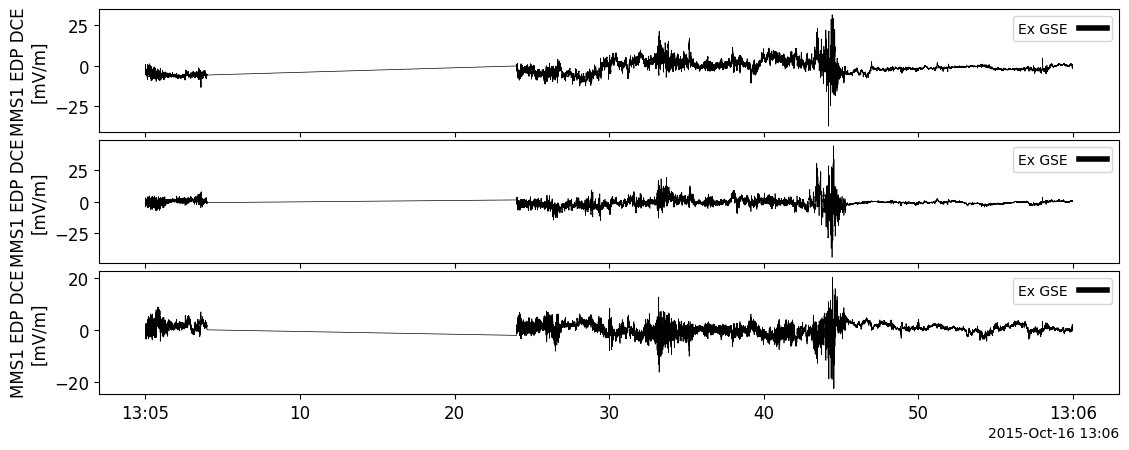

In [34]:
from pyspedas import tplot

tplot(['mms1_edp_dce_gse_brst_l2_x',
       'mms1_edp_dce_gse_brst_l2_y',
       'mms1_edp_dce_gse_brst_l2_z'])

And you can use `join_vec` to join them back together:

In [35]:
join_vec(['mms1_edp_dce_gse_brst_l2_x',
          'mms1_edp_dce_gse_brst_l2_y',
          'mms1_edp_dce_gse_brst_l2_z'], new_tvar='efield_from_components')

19-Feb-24 23:09:02: join_vec: The new_tvar parameter is deprecated. Please use newname instead.


'efield_from_components'

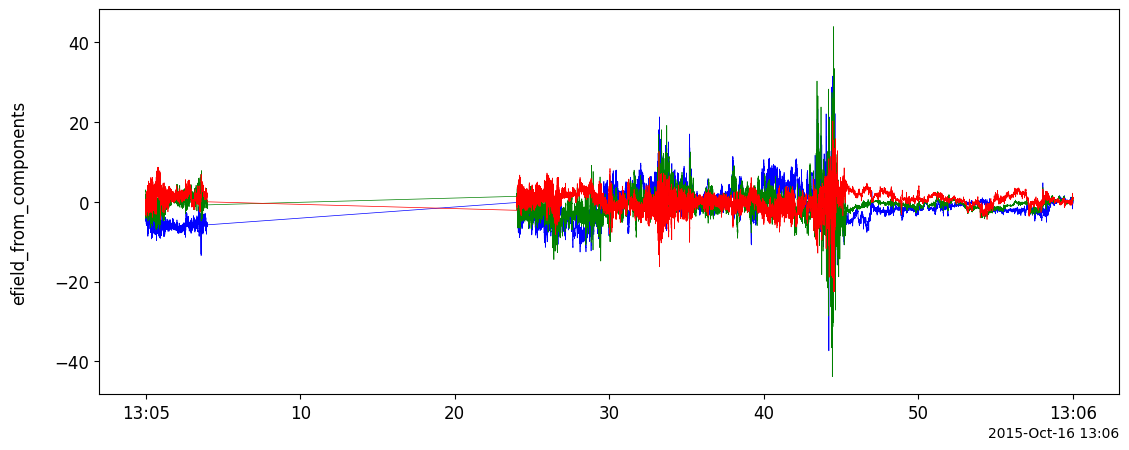

In [36]:
tplot('efield_from_components')

## Functionality for loading and saving out to common file formats

PyTplot makes this simple (already contains loaders for CDFs, netCDFs, and STS files, and it's easy to add more). 

The examples above focus on accessing the data; to create tplot variables, remove the leap seconds and call `pyspedas.store_data` to save the variables, and `pyspedas.options` to set plot options on the variables. Global plot options can be set with `pyspedas.tplot_options`